In [2]:
import numpy as np
import matplotlib.pyplot as plt



In [3]:
X0 = 5
D = 5
DX = 1
N = 64

In [4]:
def rho(i, j):
    x = i - N
    y = j - N
    return np.exp(-((x-X0)**2 + y**2)/D**2) - np.exp(-((x+X0)**2 + y**2)/D**2)

In [12]:
class Grid:
    def __init__(self, n, iterations=1000, w=1):
        self.grid = np.zeros((2*n+1, 2*n+1))
        self.n = n
        self.a_arr = []
        self.rho_arr = np.zeros((2*n+1, 2*n+1))
        self.rho_org = np.zeros((2*n+1, 2*n+1))
        self.iterations = iterations
        self.w = w

    def __repr__(self):
        return str(self.grid)

    def get_a(self):
        output = 0
        for i in range(1, self.grid.shape[0]-1):
            for j in range(1, self.grid.shape[1]-1):
                part1 = (self.grid[i+1, j] - self.grid[i-1, j]) / (2*DX)
                part1 = 0.5*part1**2
                part2 = (self.grid[i, j+1] - self.grid[i, j-1]) / (2*DX)
                part2 = 0.5*part2**2
                part3 = -self.rho_org[i, j] * self.grid[i, j]
                output += part1 + part2 + part3
        return output * DX**2

    def get_rhop(self, i, j):
        return - (self.grid[i+1, j] + self.grid[i-1, j] + self.grid[i, j-1] + self.grid[i, j+1] - 4*self.grid[i, j]) / DX**2

    def fill_rho(self):
        for i in range(1, self.grid.shape[0]-1):
            for j in range(1, self.grid.shape[1]-1):
                self.rho_org[i, j] = rho(i, j)

    def fill(self):
        for i in range(1, self.grid.shape[0]-1):
            for j in range(1, self.grid.shape[1] -1):
                self.grid[i, j] = (1-self.w) * self.grid[i, j] + self.w * 0.25 * (self.grid[i+1, j] + self.grid[i-1, j] + self.grid[i, j+1] + self.grid[i, j-1] + self.rho_org[i, j]*DX**2)
    def run(self):
        self.fill_rho()
        for i in range(self.iterations):
            self.fill()
            self.a_arr.append(self.get_a())
        for i in range(1, self.grid.shape[0]-1):
            for j in range(1, self.grid.shape[1]-1):
                self.rho_arr[i, j] = self.get_rhop(i, j)


    def plot(self, items):
        if "a" in items:
            plt.plot(self.a_arr)
            plt.title("a")
            plt.show()
        if "rho" in items:
            plt.matshow(self.rho_arr)
            plt.colorbar()
            plt.title('\u03C1')
            plt.show()
        if "rho_org" in items:
            plt.matshow(self.rho_org)
            plt.colorbar()
            plt.title('\u03C1 org')
            plt.show()
        if "rho_diff" in items:
            plt.matshow(self.rho_arr - self.rho_org)
            plt.colorbar()
            plt.title('\u03C1 diff')
            plt.show()
        if "grid" in items:
            plt.matshow(self.grid)
            plt.colorbar()
            plt.title('u')
            plt.show()




In [6]:
g = Grid(N)
g.run()


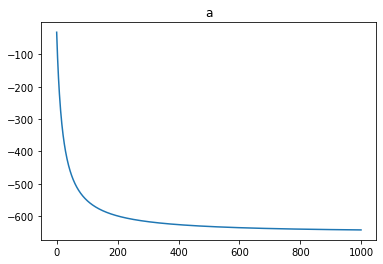

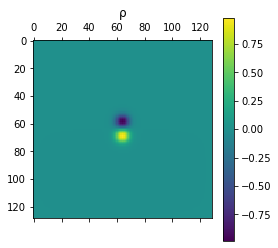

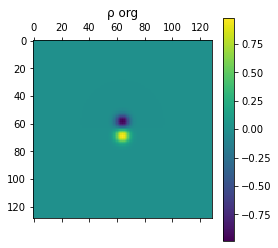

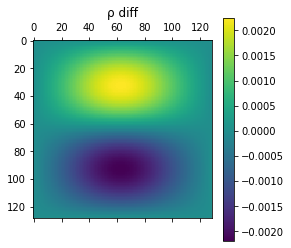

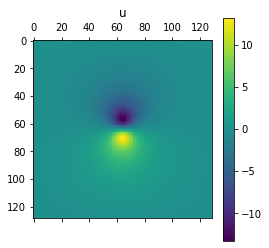

In [7]:
g.plot(["a", "rho", "rho_org", "rho_diff", "grid"])

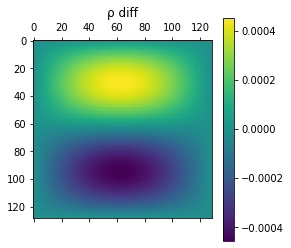

In [8]:
g = Grid(N, 2000)
g.run()
g.plot(["rho_diff"])

In [17]:
def plot_range(a, b):
    a_arr = []
    w_arr = np.linspace(a, b, 5)
    for w in w_arr:
        g = Grid(N, 100, w)
        g.run()
        a_arr.append(g.get_a())
        plt.matshow(g.rho_arr - g.rho_org)
        plt.colorbar()
        plt.title(f"w={w}")
        plt.show()
    plt.plot(w_arr, a_arr)


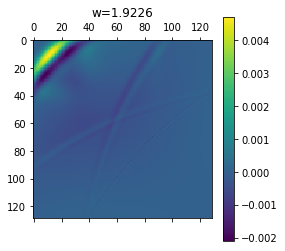

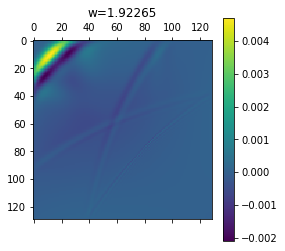

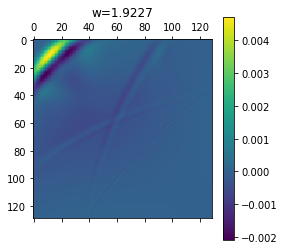

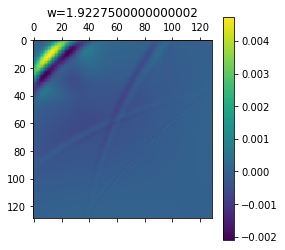

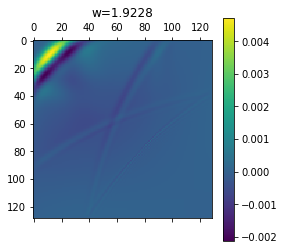

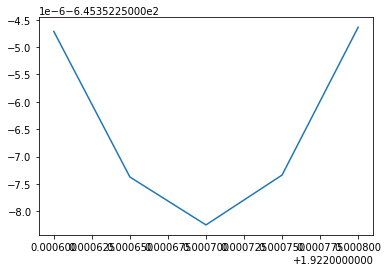

In [25]:
plot_range(1.9226, 1.9228)

In [26]:
g = Grid(N, 1000, 1.9227)
g.run()

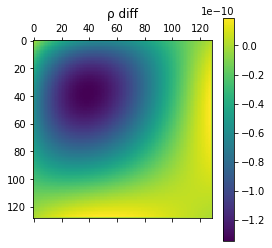

In [27]:
g.plot(["rho_diff"])

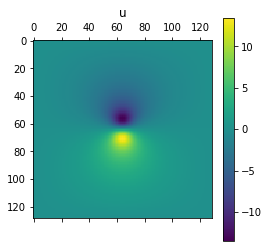